In [2]:
import csv
import pandas as pd
import numpy as np
from sklearn import model_selection
from tpot import TPOTClassifier
import tools

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
#from pyearth import Earth
from sklearn.cross_decomposition import PLSRegression


from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from skfeature.function.statistical_based import t_score
from skfeature.function.statistical_based import gini_index
from skfeature.function.similarity_based import fisher_score
from skfeature.function.similarity_based import reliefF

from sklearn.feature_selection import mutual_info_classif
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MIM
from skfeature.function.information_theoretical_based import MIFS
from skfeature.function.information_theoretical_based import MRMR
from skfeature.function.information_theoretical_based import CIFE
from skfeature.function.information_theoretical_based import JMI
from skfeature.function.information_theoretical_based import CMIM
from skfeature.function.information_theoretical_based import ICAP
from skfeature.function.information_theoretical_based import DISR

from scipy.stats import wilcoxon

from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

file = "./csv/allpredict.csv"

f = open(file)
csv_f = csv.reader(f)
features = next(csv_f)
dataset = pd.read_csv(file, names=features, usecols=range(1,9), dtype=np.float64, skiprows=1, low_memory=False)
# INITIALIZING, CLEANING, AND STRATIFYING DATASET
dataset["outcome"] = pd.to_numeric(dataset["outcome"], errors='coerce')
dataset.dropna(axis=1, thresh=2, inplace=True)
dataset.dropna(inplace=True)
array_OG = dataset.values
deep = array_OG[:,0]
outcome = array_OG[:,1]
expert1 = array_OG[:,2]
hand = array_OG[:,3]
expert2 = array_OG[:,4]
tp  =array_OG[:,5]
expert3 = array_OG[:,6]
expert4 = array_OG[:,7]

print(deep)
print(hand)
print(outcome)
print(expert1)
print(expert2)
print(tp)
print(expert3)
print(expert4)

[0.86 0.37 0.63 0.83 0.4  0.62 0.65 0.75 0.59 0.58 0.76 0.44 0.51 0.57
 0.83 0.57 0.82 0.59 0.65 0.59 0.63 0.45 0.83 0.67 0.41 0.33 0.61 0.87
 0.47 0.76 0.21 0.24 0.34 0.6  0.43 0.29 0.73 0.43 0.22 0.7  0.6  0.22
 0.32 0.48 0.3  0.68 0.87 0.24 0.42 0.31 0.89 0.69 0.25 0.33 0.53 0.28
 0.36 0.52 0.25 0.6  0.52 0.53 0.68 0.25 0.25 0.22 0.25 0.39 0.52 0.57
 0.6  0.19 0.48 0.44 0.57 0.7  0.36 0.2  0.54 0.42 0.66 0.62 0.67]
[0.2 0.8 0.8 0.8 1.  1.  0.8 0.7 0.9 1.  0.4 0.6 0.6 0.8 0.8 0.8 0.7 1.
 0.6 0.8 0.8 0.7 0.7 0.2 0.6 0.6 0.6 0.8 0.  1.  0.  0.6 0.3 0.4 0.2 0.
 0.8 0.1 0.  0.3 0.5 0.  0.  0.  0.1 0.1 0.1 0.2 0.4 0.  0.3 0.  0.4 0.
 0.  0.1 0.6 1.  0.3 0.9 0.9 0.7 0.4 0.1 0.  0.2 0.3 0.1 0.7 0.1 0.4 0.
 0.3 0.3 0.8 0.1 0.9 0.  0.6 0.5 0.4 1.  0.8]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 

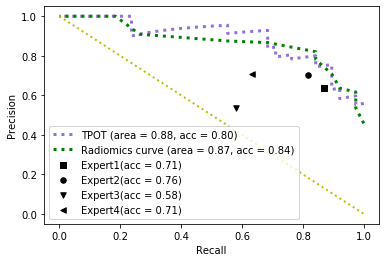

In [8]:
from sklearn import metrics
import matplotlib.pyplot as plt

#plot for tpot
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, tp, pos_label=1)
auc_CT =metrics.auc(tpr, fpr) 
plt.plot(tpr, fpr,
         label='TPOT (area = {0:0.2f}, acc = 0.80)'
         ''.format(auc_CT),
         color='mediumpurple', linestyle=':', linewidth=3)

#plot for hand optimization
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, hand, pos_label=1)
auc = metrics.auc(tpr,fpr)
plt.plot(tpr, fpr,
         label='Radiomics curve (area = {0:0.2f}, acc = 0.84)'
               ''.format(auc),
         color='green', linestyle=':', linewidth=3)

#plot for expert1
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, expert1, pos_label=1)
acc_1 = accuracy_score(outcome, expert1)
plt.scatter(tpr[1],fpr[1], marker = 's', color = 'black', label='Expert1(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, expert2, pos_label=1)
acc_2 = accuracy_score(outcome, expert2)
plt.scatter(tpr[1], fpr[1], marker = 'o', color = 'black', label='Expert2(acc = {0:0.2f})'
            ''.format(acc_2), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, expert3, pos_label=1)
acc_3 = accuracy_score(outcome, expert3)
plt.scatter(tpr[1], fpr[1], marker = 'v', color = 'black', label='Expert3(acc = {0:0.2f})'
            ''.format(acc_3), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.precision_recall_curve(outcome, expert4, pos_label=1)
acc_4 = accuracy_score(outcome, expert4)
plt.scatter(tpr[1], fpr[1], marker = '<', color = 'black', label='Expert4(acc = {0:0.2f})'
            ''.format(acc_4), s = 30)

plt.plot([0,1],[1,0],color='y',linestyle=':',linewidth=2)

plt.legend(loc = 'lower left')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('prroc.jpg')
plt.show()

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(outcome, deep,pos_label = 1)
print(precision)
print(recall)
area = metrics.auc(recall,precision)

print("Area Under PR Curve(AP): %0.2f" % area)  #should be same as AP?

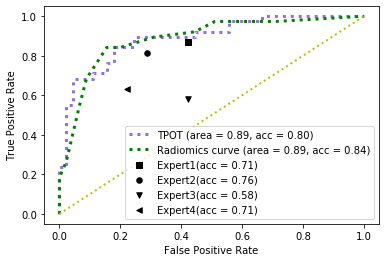

In [7]:
from sklearn import metrics
import matplotlib.pyplot as plt

#plot for tpot
fpr, tpr, thresholds= metrics.roc_curve(outcome, tp, pos_label=1)
auc_CT =metrics.auc(fpr, tpr) 
plt.plot(fpr, tpr,
         label='TPOT (area = {0:0.2f}, acc = 0.80)'
         ''.format(auc_CT),
         color='mediumpurple', linestyle=':', linewidth=3)

#plot for hand optimization
fpr, tpr, thresholds= metrics.roc_curve(outcome, hand, pos_label=1)
auc = metrics.auc(fpr,tpr)
plt.plot(fpr, tpr,
         label='Radiomics curve (area = {0:0.2f}, acc = 0.84)'
               ''.format(auc),
         color='green', linestyle=':', linewidth=3)

#plot for expert1
fpr, tpr, thresholds= metrics.roc_curve(outcome, expert1, pos_label=1)
acc_1 = accuracy_score(outcome, expert1)
plt.scatter(fpr[1],tpr[1], marker = 's', color = 'black', label='Expert1(acc = {0:0.2f})'
            ''.format(acc_1), s = 30)

#plot for expert2
fpr, tpr, thresholds= metrics.roc_curve(outcome, expert2, pos_label=1)
acc_2 = accuracy_score(outcome, expert2)
plt.scatter(fpr[1], tpr[1], marker = 'o', color = 'black', label='Expert2(acc = {0:0.2f})'
            ''.format(acc_2), s = 30)

#plot for expert3
fpr, tpr, thresholds= metrics.roc_curve(outcome, expert3, pos_label=1)
acc_3 = accuracy_score(outcome, expert3)
plt.scatter(fpr[1], tpr[1], marker = 'v', color = 'black', label='Expert3(acc = {0:0.2f})'
            ''.format(acc_3), s = 30)

#plot for expert4
fpr, tpr, thresholds= metrics.roc_curve(outcome, expert4, pos_label=1)
acc_4 = accuracy_score(outcome, expert4)
plt.scatter(fpr[1], tpr[1], marker = '<', color = 'black', label='Expert4(acc = {0:0.2f})'
            ''.format(acc_4), s = 30)

plt.plot([0,1],[0,1],color='y',linestyle=':',linewidth=2)

plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc.jpg')
plt.show()

In [22]:
print("Sensitivity: " + repr(recall_score(outcome, expert1)))
print("Sensitivity: " + repr(recall_score(outcome, expert2)))
print("Sensitivity: " + repr(recall_score(outcome, expert3)))
print("Sensitivity: " + repr(recall_score(outcome, expert4)))
print("Acc: " + repr(accuracy_score(outcome, expert4)))
tn, fp, fn, tp = confusion_matrix(outcome, expert1).ravel()
print("Specificity: " + repr(tn / (tn + fp)))
tn, fp, fn, tp = confusion_matrix(outcome, expert2).ravel()
print("Specificity: " + repr(tn / (tn + fp)))
tn, fp, fn, tp = confusion_matrix(outcome, expert3).ravel()
print("Specificity: " + repr(tn / (tn + fp)))
tn, fp, fn, tp = confusion_matrix(outcome, expert4).ravel()
print("Specificity: " + repr(tn / (tn + fp)))

#avg
#sensi:0.73
#speci:0.66

Sensitivity: 0.868421052631579
Sensitivity: 0.8157894736842105
Sensitivity: 0.5789473684210527
Sensitivity: 0.631578947368421
Acc: 0.7108433734939759
Specificity: 0.5777777777777777
Specificity: 0.7111111111111111
Specificity: 0.5777777777777777
Specificity: 0.7777777777777778


In [26]:
print(tn,fp,fn,tp)
import sys
#p is proportion of trials that were successes
#n is the number of trials
import math
def adjusted_wald(p, n, z=1.96):
    p_adj = (n * p + (z**2)/2)/(n+z**2)
    n_adj = n + z**2
    span = z * math.sqrt(p_adj*(1-p_adj)/n_adj)
    return max(0, p_adj - span), min(p_adj + span, 1.0)
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.711), float(83))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.63), float(38))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.78), float(45))))

35 10 14 24
(0.61-0.80)
(0.47-0.77)
(0.64-0.88)


In [8]:
import sys
from scipy.stats import binom_test
#x accuracy
#n = number of trials
#p accuracy compare to
x = 0.82
n =45
p = 0.66

print(binom_test(int(x * n), n, p))

0.05779684847687222


In [63]:
print("Accuracy: " + repr(accuracy_score(outcome, expert2)))
print("Sensitivity: " + repr(recall_score(outcome, expert2)))
tn, fp, fn, tp = confusion_matrix(outcome, expert2).ravel()
print("Specificity: " + repr(tn / (tn + fp)))
print(tn,fp,fn,tp)

Accuracy: 0.7590361445783133
Sensitivity: 0.8157894736842105
Specificity: 0.7111111111111111
32 13 7 31


In [103]:
#averaged
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.735), float(83))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.845), float(38))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.645), float(45))))

(0.63-0.82)
(0.70-0.93)
(0.50-0.77)


In [100]:
print("Accuracy: " + repr(accuracy_score(outcome, expert2)))
print("Average Precision Score: " + repr(average_precision_score(outcome, expert2)))
#print("Kappa: " + repr(cohen_kappa_score(Y_test, Y_pred)))
#print("Hamming Loss: " + repr(hamming_loss(Y_test, Y_pred)))
#print("AUC: " + repr(roc_auc_score(Y_test, prob)))
print("Sensitivity" + repr(recall_score(outcome,expert2)))
tn,fp,fn,tp = confusion_matrix(outcome,expert2).ravel()
print("Specificity" + repr(tn/(tn+fp)))

Accuracy: 0.7590361445783133
Average Precision Score: 0.6590981149478297
Sensitivity0.8157894736842105
Specificity0.7111111111111111


In [2]:

print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.87), float(4593))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.816), float(38))))
print("({:.2f}-{:.2f})".format(*adjusted_wald(float(0.711), float(45))))

NameError: name 'adjusted_wald' is not defined

In [15]:
import sys
from scipy.stats import binom_test
#x accuracy
#n = number of trials
#p accuracy compare to
x = 0.84
n = 38
p = 0.76

print(binom_test(int(x * n), n, p))

0.5685224029747196
